In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [14]:
#Data Collection and Preprocessing

In [15]:
#loading the data from csv file to pandas dataframe
dataset = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [16]:
#Inspecting the first five rows of the dataframe
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [17]:
#Checking the numbers of rows and columns
dataset.shape

(4340, 8)

In [18]:
#getting some info about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [19]:
#Checking for null values
dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [20]:
print(dataset['fuel'].value_counts())
print(dataset['seller_type'].value_counts())
print(dataset['transmission'].value_counts())
print(dataset['owner'].value_counts())

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64
Manual       3892
Automatic     448
Name: transmission, dtype: int64
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


In [21]:
dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}}, inplace = True)

In [22]:
dataset.replace({'seller_type':{'Dealer': 0, 'Individual':1, 'Trustmark Dealer':2}}, inplace = True)

In [23]:
dataset['transmission'] = np.where(dataset['transmission'] == 'Manual',0,1)

In [25]:
dataset['transmission'].value_counts()

0    3892
1     448
Name: transmission, dtype: int64

In [26]:
mapping = {
    'First Owner': 0,
    'Second Owner':1,
    'Third Owner':2,
    'Fourth & Above Owner': 3,
    'Test Drive Car': 4
}

In [28]:
dataset['owner'] = dataset['owner'].map(mapping) 

In [32]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,1,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,1,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,1


In [31]:
#Splitting the Data into Training Data and Test Data

In [34]:
X = dataset.drop(['name', 'selling_price'], axis = 1)
y = dataset['selling_price']

In [36]:
#Splitting the Training and Test Data

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 2)

In [37]:
#Model Training using Linear Regression

In [38]:
lin_reg = LinearRegression()

In [41]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [42]:
#Model Evaluation

In [43]:
training_data_pred = lin_reg.predict(X_train)

In [46]:
#Using r2 error
error_score = metrics.r2_score(y_train, training_data_pred)
print(error_score)

0.4276361285018677


In [47]:
#Visualize the actual prices and predicted prices

Text(0.5, 1.0, 'Actual prices vs predicted prices')

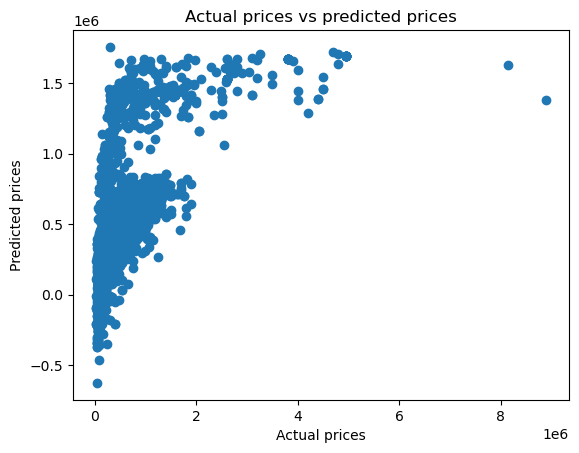

In [48]:
plt.scatter(y_train, training_data_pred)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual prices vs predicted prices')

In [50]:
test_data_pred = lin_reg.predict(X_test)

In [51]:
#Using r2 error
error_score = metrics.r2_score(y_test, test_data_pred)
print(error_score)

0.5027999353753423


In [37]:
#Model Training using Lasso Regression

In [53]:
lasso = Lasso()

In [54]:
lasso.fit(X_train, y_train)

Lasso()

In [42]:
#Model Evaluation

In [55]:
training_data_pred = lasso.predict(X_train)

In [57]:
#Using r2 error
error_score = metrics.r2_score(y_train, training_data_pred)
print(error_score)

0.42763612844686616


In [47]:
#Visualize the actual prices and predicted prices

Text(0.5, 1.0, 'Actual prices vs predicted prices')

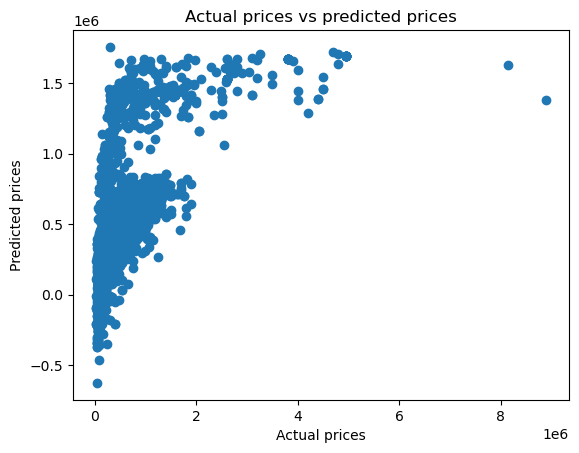

In [58]:
plt.scatter(y_train, training_data_pred)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual prices vs predicted prices')

In [59]:
test_data_pred = lasso.predict(X_test)

In [60]:
#Using r2 error
error_score = metrics.r2_score(y_test, test_data_pred)
print(error_score)

0.5027994839428185
